**주요 내용**

1. 주성분 분석을 활용한 비지도 데이터 압축
2. 지도 방식의 차원 축소 기법인 선형 판별 분석(LDA)을 이용하여 클래스 구별 능력 최대화
3. 커널 PCA를 사용하여 비선형 차원 축소하기

# 1.주성분 분석을 통한 비지도 차원 축소

- 특성 선택과 마찬가지로 여러 가지 특성 추출 기법을 사용하여 데이터셋의 특성 개수를 줄일 수 잇음
- 특성 선택과 특성 추출의 차이는 원본 특성을 유지하느냐에 있음
- 순차 후진 선택 같은 특성 선택 알고리즘을 사용할 때는 원본 특성을 유지
- 특성 추출은새로운 특성 공간으로 데이터를 변환하거나 투영

## 1.1.주성분 분석의 주요 단계

- PCA는 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있음
- PCA는 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영
- 새로운 부분 공간의 직교 좌표는 주어진 조건하에서 분산이 최대인 방향으로 해석할 수 있음
- PCA 단계별 정리
    1. $d$차원 데이터셋을 표준화 전처리
    2. 공분산 행렬을 만듦
    3. 공분산 행렬의 고유 벡터와 고윳값으로 분해
    4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매김
    5. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택 (여기서 $k$는 새로운 특성 부분 공간의 차원 $k \leq d$)
    6. 최상위 $k$개의 고유 벡터로 투영 행렬 $\mathbf{W}$를 만듦
    7. 투영 행렬 $\mathbf{W}$를 사용해서 $d$차원 입력 데이터 셋 $\mathbf{X}$를 새로운 $k$ 차원의 특성 부분 공간으로 변환

## 1.2.주성분 추출 단계

- 초기 PCA의 4단계
    1. 데이터 표준화 전처리
    2. 공분산 행렬 구하기
    3. 공분산 행렬의 고윳값과 고유 벡터를 구함
    4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매김

In [31]:
import pandas as pd

df_wine = pd.read_csv('./datasets/wine/wine.data', header=None)

In [32]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=0)

from sklearn.preprocessing import StandardScaler as SDS

scaler = SDS()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**공분산 행렬 만들기**

- 공분산 행렬은 $d \times d$ 차원의 대칭 행렬로 특성 상호 간의 공분산을 저장
- $d$는 데이터셋에 있는 차원 개수
- 전체 샘플에 대한 두 특성 $x_j$와 $x_k$ 사이의 공분산은 다음과 같음
    $$
    \sigma_{jk}=\frac{1}{n-1}\sum_{i=1}^{n}(x_j^{(i)}-\mu_{j})(x_k^{(i)}-\mu_{k})
    $$
- 여기서 $\mu_j$와$\mu_k$는 특성 $j$와 $k$의 샘플 평균
- 데이터 셋을 표준화 전처리했기 때문에 샘플 평균은 0
- 두 특성 간 양의 공분산은 특성이 함께 증가하거나 감소하는 것을 나타냄
- 반면 음의 공분산은 특성이 반대 방향으로 달라진다는 것을 나타냄
- 세 개의 특성으로 이루어진 공분산 행렬은 다음과 같이 쓸 수 있음
    $$
    \Sigma=\begin{bmatrix}
            \sigma_1^2&\sigma_{12}&\sigma_{13} \\
            \sigma_{21}&\sigma_2^2&\sigma_{23} \\
            \sigma_{31}&\sigma_{32}&\sigma_3^2
            \end{bmatrix}
    $$
- 공분산 행렬의 고유 벡터가 주성분(최대 분산의 방향)을 표현함
- 이에 대응되는 고윳값은 주성분의 크기
- 와인 데이터 셋의 경우 13 x 13 차원의 공분산 행렬로부터 13개의 고유벡터와 고윳값을 얻을 수 있음

<br>

**공분산 행렬의 고유 벡터와 고윳값의 쌍 구하기**

$$
\Sigma\mathbf{v} = \lambda\mathbf{v}
$$

- $\lambda$는 스케일을 담당하는 고윳값
- `numpy`의 `linalg.eig()`함수를 사용하여 와인 데이터셋의 공분산 행렬에 대한 고유 벡터와 고윳값 쌍을 계산

In [33]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f"고윳값\n{eigen_vals}")

고윳값
[4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


- `numpy.linalg.eig`함수는 대칭과 비대칭 정방 행렬을 모두 다룰 수 있지만 이따금 복소수 고윳값을 반환
- 에르미트 행렬을 분해하기 위해 구현된 `numpy.linal.eigh` 함수는 공분산 행렬과 같은 대칭 행렬을 다룰 때 수치적으로 더 안정된 결과를 만듦
- `numpy.linalg.eigh`는 항상 실수 고윳값을 반환

- 사이킷런의 PCA클래스는 직접 고윳값과 고유 벡터를 계산하는 대신 특이 값 분해 (Singular Value Decomposition) 방식을 사용하여 주성분을 구함
- 원점에 중앙이 맞추어진 공분산 행렬을 특이 값 분해로 표현
$$
Cov=\frac{1}{n-1}\mathbf{X}^T\mathbf{X}=\frac{1}{n-1}(\mathbf{U} \Sigma \mathbf{V}^T)^T(\mathbf{U} \Sigma \mathbf{V^T})=\frac{1}{n-1}(\mathbf{V} \Sigma \mathbf{U}^T)(\mathbf{U} \Sigma \mathbf{V}^T)=\frac{1}{n-1}\mathbf{V} \Sigma^2 \mathbf{V}^T = \mathbf{V}\frac{\Sigma^2}{n-1}\mathbf{V}^T
$$
- 따라서 $\mathbf{V}$가 공분산 행렬의 고유 벡터이고 주성분이 됨
- 사이킷런의 PCA는 `scipy.linalg.svd`함수를 사용하여 주성분 $\mathbf{V}$를 구함
- 이 식에서 $\Sigma$는 공분산 행렬이 아니라 행렬 $\mathbf{X}$와 같은 크기의 대각 행렬
- 고윳값은 특이 값 $\Sigma$를 제곱하여 (샘플개수 - 1)로 나누어 계산할 수 있음
- 사이킷런은 샘플 개수로 나누는 버그를 가지고 있었지만, 0.19 버전에서 수정됨 (특이값을 저장하는 singular_values 속성 추가)

## 1.3.총 분산과 설명된 분산

- 데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보(분산)를 가진 고유 벡터(주성분) 일부만 선택
- 고윳값은 고유 벡터의 크기를 결정하므로 고윳값을 내림차순으로 정렬
- 고윳값 순서에 따라 최상위 $k$개의 고유 벡터를 선택
- 가장 정보가 많은 고유 벡터를 선택하기 전, 고윳값의 설명된 분산 비율을 그래프로 그려 보고 결정
$$
설명된\,\,분산\,\,비율=\frac{\lambda_j}{\sum_{j=1}^d \lambda_j}
$$

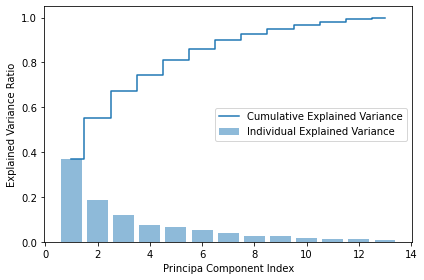

In [34]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha=.5, align='center', label='Individual Explained Variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principa Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## 1.4.특성 변환

- 공분산 행렬을 고유 벡터와 고윳값 쌍으로 분해한 후 데이터셋을 새로운 주성분 축으로 변환하는 단계 필요
    1. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택 (여기서 $k$는 새로운 특성 부분 공간의 차원 $k\leq d$)
    2. 최상위 $k$개의 고유 벡터로 투영 행렬 $\mathbf{W}$를 만듦
    3. 투영 해렬 $\mathbf{W}$를 사용해서 $d$차원 입력 데이터셋 $\mathbf{X}$를 새로운 $k$차원의 특성 부분 공간으로 변환
- 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환

In [35]:
# (고윳값, 고유 벡터) 튜플의 리스트를 만듦
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 튜플 정렬
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

eigen_pairs

[(4.842745315655896,
  array([-0.1372,  0.2472, -0.0255,  0.2069, -0.1544, -0.3938, -0.4174,
          0.3057, -0.3067,  0.0755, -0.3261, -0.3686, -0.2967])),
 (2.4160245870352295,
  array([ 0.503 ,  0.1649,  0.2446, -0.1135,  0.2897,  0.0508, -0.0229,
          0.0905,  0.0084,  0.5498, -0.2072, -0.249 ,  0.3802])),
 (1.548458248820353,
  array([-0.1377,  0.0962,  0.6778,  0.625 ,  0.1961,  0.1403,  0.1171,
          0.1312,  0.0304, -0.0799,  0.0531,  0.1324, -0.0707])),
 (0.9612043774977376,
  array([-0.0033,  0.5626, -0.109 ,  0.0338, -0.3675,  0.2402,  0.1871,
         -0.0229,  0.4963,  0.1065, -0.3691,  0.142 , -0.1677])),
 (0.8416616104578413,
  array([ 0.2906, -0.0895,  0.1608, -0.0516, -0.6765,  0.1185,  0.1071,
          0.5076, -0.2016, -0.0057,  0.2769,  0.0666,  0.128 ])),
 (0.662063404038304,
  array([-2.9910e-01, -6.2704e-01, -3.8913e-04,  4.0584e-02, -6.5777e-02,
          5.8978e-02,  3.0110e-02,  2.7173e-01,  4.4000e-01,  4.1174e-01,
         -1.4167e-01, -1.7584e-01

- 다음 가장 큰 두 개의 고윳값에 해당하는 고유 벡터 선택
- 이 데이터셋에 있는 분산의 약 60%를 잡아낼 수 있음

In [36]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('투영행렬\n', w)

투영행렬
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


- PCA 부분 공간 2개의 주성분을 투영할 수 있음
$$
\mathbf{x}^{'}=\mathbf{x}\mathbf{W}
$$

In [37]:
X_train_std[0].dot(w)

array([2.383 , 0.4546])

In [38]:
X_train_pca = X_train_std.dot(w)

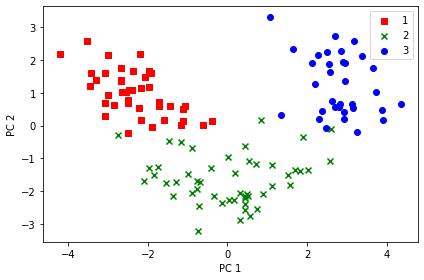

In [39]:
colors = ['r','g','b']
markers = ['s','x','o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- PCA는 어떤 클래스 레이블 정보도 사용하지 않는 비지도 학습 기법임!!

## 1.5.사이킷런의 주성분 분석

In [40]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), (np.arange(x2_min, x2_max, resolution)))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    
    # 클래스 샘플 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.6, c=cmap.colors[idx], edgecolor='black', marker=markers[idx], label=cl)

C:\Users\yunjc\AppData\Local\Temp\ipykernel_16068\1472262380.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.6, c=cmap.colors[idx], edgecolor='black', marker=markers[idx], label=cl)


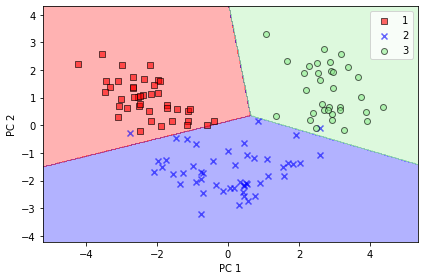

In [41]:
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LGR(random_state=1)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\yunjc\AppData\Local\Temp\ipykernel_16068\1472262380.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.6, c=cmap.colors[idx], edgecolor='black', marker=markers[idx], label=cl)


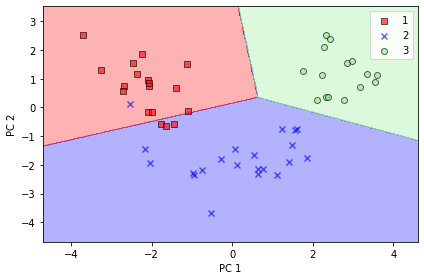

In [42]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**PCA 클래스의 다른 기능들**

In [43]:
# n_components=None
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

In [44]:
# n_components (0,1) 사이 값

pca = PCA(n_components=0.85)
pca = pca.fit(X_train_std)
print('주성분 개수: ',pca.n_components_)
print('설명된 분산 비율: ', sum(pca.explained_variance_ratio_))

주성분 개수:  6
설명된 분산 비율:  0.8600963882451359


In [45]:
# n_components = 'mle' (토마스 민카가 제안한 차원 선택 방식)

pca = PCA(n_components='mle')
pca = pca.fit(X_train_std)
print('주성분 개수: ',pca.n_components_)
print('설명된 분산 비율: ', sum(pca.explained_variance_ratio_))

주성분 개수:  9
설명된 분산 비율:  0.9499753029186233


- PCA의 가장 큰 제약 사항 중 하나는 배치로만 실행되기에 대용량 데이터셋 처리시 많은 메모리 필요
- `IncrementalPCA`를 사용하여 로컬 파일로부터 데이터를 조금씩 읽어 올 수 있음
- `partial_fit()`메서드는 네트워크나 로컬 파일 시스템으로부터 조금씩 데이터를 받아서 훈련할 수 있음
- `fit()`메서드는 `numpy.memmap`을 사용하여 로컬 파일로부터 데이터를 조금씩 읽어 올 수 있음
- 한 번에 읽어 올 데이터 크기는 `IncrementalPCA`클래스의 `batch_size`로 지정

In [46]:
from sklearn.decomposition import IncrementalPCA as IPCA

ipca = IPCA(n_components=9)
for batch in range(len(X_train_std)//25 +1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)
print('주성분 개수: ',ipca.n_components_)
print('설명된 분산 비율: ', np.sum(ipca.explained_variance_ratio_))

주성분 개수:  9
설명된 분산 비율:  0.9478392700446663


# 2.선형 판별 분석을 통한 지도 방식의 압축

- 선형 판별 분석 (Linear Discriminant Analysis, LDA)은 규제가 없는 모델에서 차원의 저주로 인한 과대 적합 정도를 줄이고 계산 효율을 높이기 위한 특성 추출 방법
- 일반적인 PCA와 유사한 개념을 가짐
- PCA가 데이터셋에 있는 부산이 최대인 직교 성분 축을 찾으려고 하는 반면, LDA 목표는 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것

## 2.1.주성분 분석 VS 선형 판별 분석

- PCA와 LDA 모두 데이터셋의 차원 개수를 줄일 수 있는 선형 변환 기법
- LDA는 지도 학습 알고리즘이기에 PCA보다 분류 작업에서 더 뛰어난 특성 추출 기법이라고 생각할 수 있음
- 마르티네스는 PCA를 통한 전처리가 특정 이미지 인식 작업에 더 뛰어난 분류 결과를 내는 경향이 있다고 보고 함

```text
* 피셔의 LDA

- LDA를 이따금 피셔의 LDA라고 부름
- 피션 선형 판별은 나중에 라다크리슈나 라오에 의해 클래스 공분산이 동일하고 정규 분포라는 가정하에 1948년 다중 클래스 문제로 일반화
- 이것을 지금의 LDA라 부름
```

- LDA의 가정 사항
    1. 데이터가 정규 분포
    2. 클래스가 동일한 공분산 행렬을 가지고 훈련 샘플은 서로 통계적으로 독립적이라고 가정
- 하나 이상의  가정이 (조금)위반되더라도 여전히 LDA는 차원 축소를 잘 수행함

## 2.2.선형 판별 분석의 내부 동작 방식

**LDA 수행의 주요 단계**

1. $d$ 차원의 데이터셋을 표준화 전처리함($d$는 특성 개수)
2. 각 클래스에 대해 $d$차원의 평균 벡터를 계산
3. 클래스 간의 산포 행렬 $\mathbf{S}_B$와 클래스 내 산포 행렬 $\mathbf{S}_W$를 구성함
4. $\mathbf{S}_W^{-1} \mathbf{S}_B$ 행렬의 고유 벡터와 고윳값을 계산
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매김
6. 고윳값이 가장 큰 $k$개의 고유 벡터를 선택하여 $d \times k$ 차원의 변환 행렬 $\mathbf{W}$를 구성 (이 행렬의 열이 고유 벡터)
7. 변환 행렬 $\mathbf{W}$를 사용하여 샘플을 새로운 특성 부분 공간으로 투영

- LDA는 행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성한다는 점에서 PCA와 매우 유사
- LDA는 <span style="color:orange">**단계** 2</span>에서 계산하는 평균 벡터를 만드는 데 클래스 레이블 정보를 사용
- 클래스 레이블별로 데이터를 나누어 평균을 구함

## 2.3. 산포 행렬 계산

- PCA 절에서 Wine 데이터 셋의 특성을 이미 표준화했기에 <span style="color:orange">**단계 1**</span>을 건너 뜀
- 평균 벡터를 사용하여 클래스 간의 산포 행렬과 클래스 내 산포 행렬을 구성함
- 평균 벡터 $\mathbf{m}_i$는 클래스 $i$의 샘플에 대한 특성 평균값  $\mu_m$을 저장
$$\begin{align*}
\mathbf{m}_i &= \frac{1}{n_i}\sum_{x \in D_i}\mathbf{x}_m\\
\mathbf{m}_i &= \begin{bmatrix} \mu_{i, alchol} \\ \mu_{i, malic\,\,acid} \\ \cdots \\ \mu_{i, proline} \end{bmatrix} \,\,\,\, i \in {1,2,3}
\end{align*}$$

In [47]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print(f"MV {label}: {mean_vecs[label-1]}")

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


- 평균 벡터를 사용하여 클래스 내 산포 행렬 $\mathbf{S}_W$를 계산할 수 있음
$$\mathbf{S}_W = \sum_{i=1}^c\mathbf{S}_i$$
- 이 행렬은 개별 클래스 $i$의 산포 행렬 $\mathbf{S}_i$를 더해 구함
$$\mathbf{S}_i = \sum_{x \in D_i}(\mathbf{x}-\mathbf{m_i})^T(\mathbf{x}-\mathbf{m_i})$$

In [48]:
d = 13 # 특성 갯수
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter  += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print(f"클래스 내의 산포 행렬: {S_W.shape[0]}x{S_W.shape[1]}")

클래스 내의 산포 행렬: 13x13


- 산포 행렬 계산 시, 훈련 데이터셋의 클래스 레이블이 균등하게 분포되어 있다고 가정
- 클레스 레이블의 개수를 출력해 보면 이 가정이 틀렸음을 알 수 있음

In [49]:
np.bincount(y_train)[1:]

array([41, 50, 33], dtype=int64)

- 개별 산포 행렬 $\mathbf{S}_i$를 산포 행렬 $\mathbf{S}_W$로 모두 더하기 전에 스케일을 조정해야 함
- 산포 행렬을 클래스 샘플 개수 $n_i$로 나누면 사실 산포 행렬을 계산하는 것이 공분산 행렬 $\Sigma_i$를 계산하는 것과 같아짐
- 즉, 공분산 행렬은 산포 행렬의 정규화 버전
$$
\Sigma_i = \frac{1}{n_i}\mathbf{S}_i=\frac{1}{n_i}\sum_{x \in D_i}(\mathbf{x}-\mathbf{m}_i)^T(\mathbf{x}-\mathbf{m}_i)
$$

In [50]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T) # 공분산 행렬은 산포 행렬의 정규화
    S_W += class_scatter
print(f"스케일이 조정된 클래스 내의 산포 행렬: {S_W.shape[0]}x{S_W.shape[1]}")

스케일이 조정된 클래스 내의 산포 행렬: 13x13


- 클래스 간의 산포 행렬 계산
$$ \begin{align*}
\mathbf{S}_B = \sum_{i=1}^c n_i(\mathbf{m}_i-\mathbf{m})^T(\mathbf{m}_i-\mathbf{m}) & \\
& \mathbf{m}:\,\,\,모든\,\,클래스의\,\,샘플을\,\,포함하여\,\,계산된\,\,전체\,\,평균
\end{align*}$$

In [51]:
mean_overall = np.mean(X_train_std, axis=0)
print(f"열 벡터 만들기 전 : {mean_overall}")
mean_overall = mean_overall.reshape(d, 1) # 열벡터로 만들기
print(f"열 벡터 만들기 후 : {mean_overall}")

열 벡터 만들기 전 : [ 6.8901e-15  1.6832e-16  3.7997e-15  2.8561e-16 -3.1785e-16  1.6626e-15
  1.5982e-16 -1.1989e-15  1.8883e-15 -1.6152e-15 -5.7839e-16  8.6311e-16
 -1.3341e-16]
열 벡터 만들기 후 : [[ 6.8901e-15]
 [ 1.6832e-16]
 [ 3.7997e-15]
 [ 2.8561e-16]
 [-3.1785e-16]
 [ 1.6626e-15]
 [ 1.5982e-16]
 [-1.1989e-15]
 [ 1.8883e-15]
 [-1.6152e-15]
 [-5.7839e-16]
 [ 8.6311e-16]
 [-1.3341e-16]]


In [52]:
d = 13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)
print(f"클래스 간의 산포 행렬: {S_B.shape[0]}x{S_B.shape[1]}")

클래스 간의 산포 행렬: 13x13


## 2.4.새로운 특성 부분 공간을 위해 선형 판별 벡터 선택

- 남은 단계는 PCA와 비슷함
- 공분산 행렬에 대한 고윳값 분해를 수행하는 대신 행렬 $\mathbf{S}_W^{-1}\mathbf{S}_B$의 고윳값을 계산

In [53]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

- 고유 벡터와 고윳값 쌍을 계산 후 내림차순으로 고윳값 정렬

In [54]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
print('내림 차순 고윳값')
for ev in eigen_pairs:
    print(ev[0])

내림 차순 고윳값
349.61780890599397
172.76152218979385
3.2209587419662555e-14
3.2209587419662555e-14
2.6106523402387364e-14
1.7038977764581827e-14
1.7038977764581827e-14
1.687554433463065e-14
1.687554433463065e-14
7.584950171788759e-15
2.9412105155181146e-15
2.9412105155181146e-15
0.0


- LDA에서 선형 판별 벡터는 최대 $c-1$개
- $c$는 클래스 레이블의 개수
- 클래스 간의 산포 행렬 $\mathbf{S}_B$가 랭크 1 또는 그 이하인 $c$개의 행렬을 합한 것이기 때문
    - 클래스별 평균 벡터인 `mean_vec`을 (13, 1) 크기의 열 벡터로 만든 후 외적을 하여 (13, 13) 행렬을 만듦
    - 이 행렬은 행과 열이 같은 배수로 증가하기 때문에 최대 랭크가 1
    - 마지막 클래스의 평균 벡터는 다른 클래스의 평균 벡터에 종속적이므로 전체 산포 행렬 $S_B$의 평균 랭크는 $c-1$이 됨
- 0이 아닌 고윳값이 두 개만 있는 것을 볼 수 있음
- 선형 판별 벡터로 잡은 클래스 판별 정보가 얼마나 많은지 측정하기 위해 PCA에서 만든 설명된 분산 그래프와 비슷하게 고윳값의 내림차순으로 선형 판별 벡터 그리기

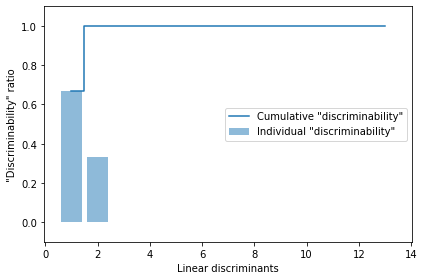

In [55]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=.5, align='center', label = 'Individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid', label = 'Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 두 개의 판별 고유 벡터를 열로 쌓아서 변환 행렬 $\mathbf{W}$로 만들기

In [56]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.1481, -0.4092],
       [ 0.0908, -0.1577],
       [-0.0168, -0.3537],
       [ 0.1484,  0.3223],
       [-0.0163, -0.0817],
       [ 0.1913,  0.0842],
       [-0.7338,  0.2823],
       [-0.075 , -0.0102],
       [ 0.0018,  0.0907],
       [ 0.294 , -0.2152],
       [-0.0328,  0.2747],
       [-0.3547, -0.0124],
       [-0.3915, -0.5958]])

## 2.5.새로운 특성 공간으로 샘플 투영

- 변환 행렬 $\mathbf{W}$를 훈련 데이터셋에 곱해서 데이터를 변환할 수 있음
$$
\mathbf{X}^{'}=\mathbf{X}\mathbf{W}
$$

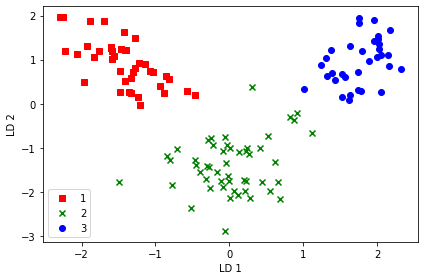

In [57]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1]*(-1),c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 2.6.사이킷런의 LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

C:\Users\yunjc\AppData\Local\Temp\ipykernel_16068\1472262380.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.6, c=cmap.colors[idx], edgecolor='black', marker=markers[idx], label=cl)


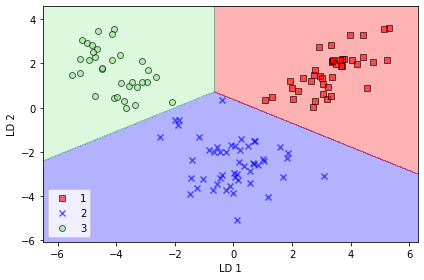

In [59]:
lr = LGR(random_state=1)
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\yunjc\AppData\Local\Temp\ipykernel_16068\1472262380.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=.6, c=cmap.colors[idx], edgecolor='black', marker=markers[idx], label=cl)


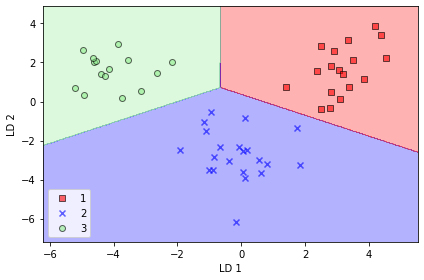

In [60]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 3.커널 PCA를 사용하여 비선형 매핑

- 많은 머신 러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다는 가정을 함
- 퍼셉트론은 수렴하기 위해 훈련 데이터가 선형적으로 완벽하게 분리 가능해야 함
- 지금까지 다뤘던 알고리즘들은 선형적으로 완벽하게 분리되지 못한 이유를 잡음 때문이라고 가정 (아달린, LGR, 기본 SVM)
- 비선형 문제를 다루어야 할 때는 PCA와 LDA 같은 차원 축소를 위한 선형 변환 기법은 최선의 선택이 아닐 수 있음
- PCA의 커널화 버전 또는 KPCA를 다룸
- SVM 개념과 관계가 있음
- 커널 PCA를 사용하여 선형적으로 구분되지 않는 데이터를 선형 분류기에 적합한 새로운 저차원 부분 공간으로 변환하는 방법

## 3.1.커널 함수와 커널 트릭

- 비선형 문제를 해결하기 위해 클래스가 선형으로 구분되는 새로운 고차원 특성 공간으로 투영할 수 있음
- $k$ 고차원 부분 공간에 있는 샘플 $\mathbf{x} \in \mathbb{R}^d$를 변환하기 위해 비선형 매핑 함수 $\phi$를 정의
$$
\phi : \mathbb{R}^d \to \mathbb{R}^k\,\,(k >> d)
$$
- $\phi$ 함수를 $d$ 차원의 원본 데이터셋에서 더 큰 $k$ 차원의 특성 공간으로 매핑하기 위해 원본 특성의 비선형 조합을 만드는 함수로 생각할 수 있음
- 예를 들어 2차원의 특성 벡터 $\mathbf{x} \in \mathbb{R}^d$가 있으면 ($x$는 $d$개의 특성으로 구성된 열 벡터), 매핑 가능한 3D 공간은 다음과 같음
$$
\mathbf{x} = [x_1, x_2]^T \\
\downarrow \, \phi \\
\mathbf{z} = \begin{bmatrix}x_{1}^{2}, \sqrt{2x_1,x_2}, x_{2}^2\end{bmatrix}^T
$$
- 커널 PCA를 통한 비선형 매핑을 수행하여 데이터를 고차원 공간으로 변환
- 그다음 고차원 공간에 표준 PCA를 사용하여 샘플이 선형 분류기로 구분될 수 있는 저차원 공간으로 데이터를 투영 (샘플이 이 입력 공간에서 잘 구분될 수 있다고 가정)
- 단점은 계산 비용이 매우 비쌈
- 커널 트릭이 등장하는데, 이는 원본 특성 공간에서 두 고차원 특성 벡터의 유사도를 계산할 수 있음
- 비싼 계산 비용 문제를 해결하는 커널 트릭에 대해 알아보기 전, 표준 PCA부터 시작
- 두 개의 특성 $k$와 $j$ 사이의 공분산은 다음과 같이 계산
$$
\sigma_{jk}=\frac{1}{n}\sum_{i=1}^{n}(x_{j}^{(i)}-\mu_j)(x_{k}^{(i)}-\mu_k)
$$
- $\mu_j=0,\,\mu_k=0$처럼 특성 평균을 0에 맞추었으므로 이 식은 다음과 같이 쓸 수 있음
$$
\sigma_{jk}=\frac{1}{n}\sum_{i=1}^n x_{j}^{(i)}x_{k}^{(i)}
$$
- 이 식은 두 특성 간의 공분산을 의미. 공분산 행렬 $\Sigma$를 계산하는 일반식으로 바꾸어 본다면
$$
\Sigma=\frac{1}{n} \sum_{i=1}^n \mathbf{x}^{(i)}\mathbf{x}^{(i)^T}
$$
- 베른하르트 슐코프는 이 방식을 일반화하여 $\phi$를 통한 비선형 특성 조합으로 원본 특성 공간의 샘플 사이의 점곱을 대체
$$
\Sigma=\frac{1}{n} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T
$$
- 이 공분산 행렬에서 고유 벡터를 얻기 위해서는 다음의 식을 풀어야 함
$$ \begin{align*}
&\Sigma \mathbf{v} = \lambda \mathbf{v} \\
&\Rightarrow \frac{1}{n} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T \mathbf{v} = \lambda \mathbf{v} \\
&\Rightarrow \mathbf{v} = \frac{1}{n\lambda} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T = \sum_{i=1}^{n}\mathbf{a}^{(i)}\phi(\mathbf{x}^{(i)})
\end{align*} $$
- 여기서 $\lambda$와 $\mathbf{v}$는 공분산 행렬 $\Sigma$의 고윳값과 고유 벡터
- $\mathbf{a}$는 커널 행렬 $\mathbf{K}$의 고유 벡터를 추출함으로써 구할 수 있음
- 이 과정에 공분산 행렬을 행렬 표기법으로 나타내면 다음과 같음 ($\phi(\mathbf{X})$는 $n \times k$ 차원의 행렬)
$$
\Sigma=\frac{1}{n} \sum_{i=1}^n \phi(x^{(i)}) \phi(x^{(i)})^T = \frac{1}{n} \phi(\mathbf{X})^T \phi(\mathbf{X})
$$
- 고유 벡터 식은 다음과 같이 쓸 수 있음
$$
\mathbf{v}=\sum_{i=1}^{n}\mathbf{a}^{(i)}\phi(\mathbf{x}^{(i)})=\phi(\mathbf{X})^T\mathbf{a}
$$
- $\Sigma\mathbf{v}=\lambda\mathbf{v}$이기 때문에 다음을 얻을 수 있음
$$
\frac{1}{n}\phi(\mathbf{X})^T\phi(\mathbf{X})\phi(\mathbf{X})^T\mathbf{a}=\lambda\phi(\mathbf{X})^T\mathbf{a}
$$
- 식의 양쪽에 $\phi(\mathbf{X})$를 곱하면 다음을 얻을 수 있음
$$ \begin{align*}
\frac{1}{n}&\phi(\mathbf{X})\phi(\mathbf{X})^T\phi(\mathbf{X})\phi(\mathbf{X})^T\mathbf{a} = \lambda\phi(\mathbf{X})\phi(\mathbf{X})^T\mathbf{a} \\
& \Rightarrow \frac{1}{n}\phi(\mathbf{X})\phi(\mathbf{X})^T\mathbf{a} = \lambda\mathbf{a} \\
& \Rightarrow \frac{1}{n}\mathbf{K}\mathbf{a} = \lambda\mathbf{a}
\end{align*}$$
- 여기서 $\mathbf{K}$는 유사도(커널) 행렬
$$
\mathbf{K} = \phi(\mathbf{X})\phi(\mathbf{X})^T
$$
- 커널 SVM을 사용하여 비선형 문제 풀기를 떠올리면 커널 트릭을 사용하여 샘플 $\mathbf{x}$끼리의 $\phi$함수 점곱을 커널 함수 $\mathbf{K}$로 바꿈으로써 고유 벡터를 명시적으로 계산할 필요가 없었음
$$
\kappa(\mathbf{x^{(i)}, x^{(j)}})=\phi(x^{(i)})^T\phi(x^{(j)})
$$
- 이는 커널 PCA로 얻은 것은 표준 PCA 방식에서처럼 투영 행렬을 구성한 것이 아니고 각각의 성분에 이미 투영된 샘플
- 기본적으로 커널 함수는 두 벡터 사이의 점곱을 계산할 수 있는 함수 (즉, 유사도를 측정할 수 있는 함수)

**가장 널리 사용되는 커널**

1. 다항 커널
    $$  \begin{align*}
    \kappa(\mathbf{x^{(i)}, x^{(j)}})&=(\mathbf{x}^{(i)T}\mathbf{x}^{(j)}+\theta)^P \\
    & 여기서\,\,\theta는\,\,임계\,\,값이고\,\,P는\,\,사용자가\,\,지정한\,\,거듭제곱
    \end{align*}    $$

2. 하이퍼볼릭 탄젠트(시그모이드) 커널
    $$
    \kappa(\mathbf{x^{(i)}, x^{(j)}})=\tanh(\eta\mathbf{x}^{(i)T}\mathbf{x}^{(j)}+\theta)
    $$

3. 방사 기저 함수(가우시안 커널, RBF)
    $$
    \kappa(\mathbf{x^{(i)}, x^{(j)}})=\exp\left (-\frac{\begin{Vmatrix} \mathbf{x}^{(i)}-\mathbf{x}^{(j)} \end{Vmatrix}^2}{2\sigma^2}\right )
    $$
    - 이는 변수 $\gamma=\frac{1}{2\sigma^2}$를 도입하여 다음과 같이도 쓰임
    $$
    \kappa(\mathbf{x^{(i)}, x^{(j)}})=\exp\left (-\gamma\begin{Vmatrix} \mathbf{x}^{(i)}-\mathbf{x}^{(j)} \end{Vmatrix}^2 \right )
    $$

**RBF 커널 PCA 구현**

1. 커널 행렬 $\mathbf{K}$를 다음 식으로 계산
    - 커널 행렬 계산
    
    $$
    \kappa \left ( \mathbf{x}^{(i)}, \mathbf{x}^{(j)} \right ) = \exp \left ( -\gamma \begin{Vmatrix} \mathbf{x}^{(i)} - \mathbf{x}^{(j)} \end{Vmatrix}^2 \right )
    $$
    
    - 샘플의 모든 쌍에 대해 구함

    $$
    \mathbf{K} = \begin{bmatrix}
                \kappa \left ( \mathbf{x}^{(1)}, \mathbf{x}^{(1)} \right ) & \kappa \left ( \mathbf{x}^{(1)}, \mathbf{x}^{(2)} \right )  & \cdots  & \kappa \left ( \mathbf{x}^{(1)}, \mathbf{x}^{(n)} \right ) \\
                \kappa \left ( \mathbf{x}^{(2)}, \mathbf{x}^{(1)} \right ) & \kappa \left ( \mathbf{x}^{(2)}, \mathbf{x}^{(2)} \right )  & \cdots  & \kappa \left ( \mathbf{x}^{(2)}, \mathbf{x}^{(n)} \right ) \\
                \vdots & \vdots & \ddots & \vdots \\
                \kappa \left ( \mathbf{x}^{(n)}, \mathbf{x}^{(1)} \right ) & \kappa \left ( \mathbf{x}^{(n)}, \mathbf{x}^{(2)} \right )  & \cdots  & \kappa \left ( \mathbf{x}^{(n)}, \mathbf{x}^{(n)} \right )
                \end{bmatrix}
    $$

    - 100개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 $100 \times 100$ 차원이 됨
<br><br>

2. 다음 식을 사용하여 커널 행렬 $\mathbf{K}$를 중앙에 맞춤
    - $\mathbf{1}_n$은 모든 값이 $\frac{1}{n}$인 $n \times n$차원 행렬(커널 행렬과 같은 차원)
    $$
    \mathbf{K}^{'} = \mathbf{K}-\mathbf{1}_n\mathbf{K}-\mathbf{K}\mathbf{1}_n+\mathbf{1}_n\mathbf{K}\mathbf{1}_n
    $$

3. 고윳값 크기대로 내림차순으로 정렬하여 중앙에 맞춘 커널 행렬에서 최상위 $k$개의 고유 베터를 고름(표준 PCA와 다르게 고유 벡터는 주성분 축이 아니며, 이미 이 축에 투영된 샘플)


<span style="color:gold">*2단계에서 커널 행렬을 중앙에 맞추는 이유*</span>

- 표준화 전처리된 데이터를 다룬다고 가정 함
- 공분산 행렬을 구성하고 비선형 특성 조합으로 점곱을 $\phi$를 사용한 비선형 특성 조합으로 대체할 때, 사용한 모든 특성의 평균은 0
- 새로운 특성 공간을 명시적으로 계산하지 않기 때문에 이 특성 공간이 중앙에 맞추어져 있는지 보장할 수 없기 때문

## 3.2.파이썬으로 커널 PCA 구현

In [61]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현
    
    매개변수
    -------------------------
    X: {ndarray}, shape=[n_samples, n_features]
    
    gamma: float
        RBF 커널 튜닝 매개변수
        
    n_components: int
        반환할 주성분 개수
        
    반환값
    -------------------------
    X_pc: {ndarray}, shape=[n_samples, n_features]
    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬 계산
    K = exp(-gamma*mat_sq_dists)
    
    # 커널 행렬 중앙 정렬
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구함
    # scipy.linalg.eigh 함수는 오름차순을 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] # 내림차순 뒤집기
    
    # 최상위 k개의 고유 벡터 선택 (투영 결과)
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    return X_pc

**예제 1. 반달 모양 구분**

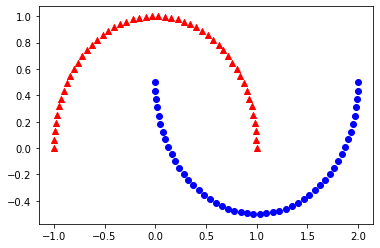

In [62]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o')
plt.show()

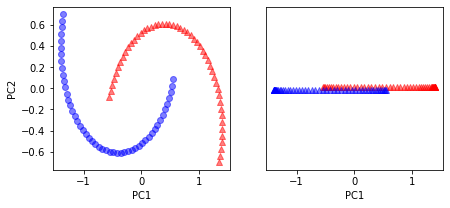

In [66]:
# 기본 PCA에 투영하기

from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='^', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

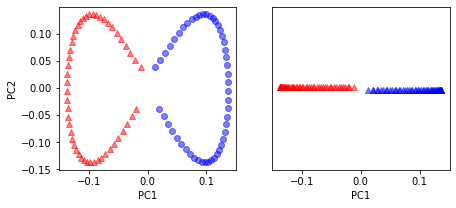

In [68]:
# rbf_kernel
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='^', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

**예제 2. 동심원 분리**

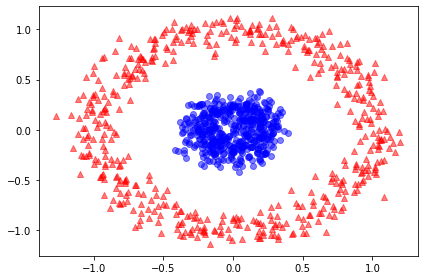

In [69]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=.1, factor=.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=.5)
plt.tight_layout()
plt.show()

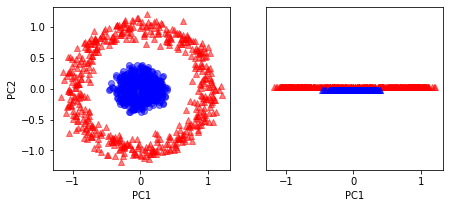

In [71]:
# 기본 PCA에 투영하기

from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='^', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

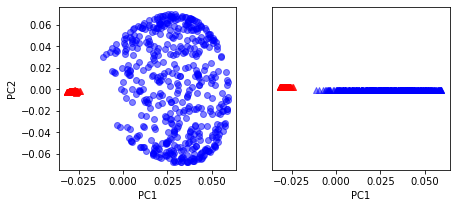

In [72]:
# rbf_kernel
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1))+0.02, color='red', marker='^', alpha=.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1))-0.02, color='blue', marker='^', alpha=.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

## 3.3.새로운 데이터 포인트 투영

- 기본 PCA 방법을 생각해 보면 변환 행렬과 입력 샘플 사이의 점곱을 계싼해서 데이터를 투영함
- 변환 행렬의 열은 공분산 행렬에서 얻은 최상위 k개의 고유벡터
- 커널 PCA 이면의 아이디어로 돌아가 보면, 중심을 맞춘 커널 행렬(공분산 행렬이 아님)의 고유벡터($\mathbf{a}$)를 구했음
- 즉, 샘플은 이미 주성분 축 $\mathbf{v}$에 투영되어 있음
- 새로운 샘플 $\mathbf{x}^{'}$를 주성분 축에 투영하려면 계산이 필요함 ($\phi(\mathbf{x}^{'})^T\mathbf{v}$)
- 커널 트릭을 사용하여 명시적으로 투영 계산($\phi(\mathbf{x}^{'})^T\mathbf{v}$)을 할 필요가 없음
- 기본 PCA와 다르게 커널 PCA는 메모리 기반 방법
- 즉, 새로운 샘플을 투영하기 위해 매번 새로운 샘플 $\mathbf{x}^{'}$사이 RBF 커널(유사도)을 계산해야 함
    $$ \begin{align*}
    \phi(\mathbf{x}^{'})^T\mathbf{v} &= \sum_{i} a^{(i)}\phi(\mathbf{x}^{'})^T\phi(\mathbf{x}^{(i)}) \\
    &= \sum_{i}a^{(i)}\kappa(\mathbf{x}^{'},\mathbf{x}^{(i)})
    \end{align*}$$
- 여기서 커널 행렬 $\mathbf{K}$의 고유 벡터 $\mathbf{a}$와 고윳값 $\lambda$는 다음의 식을 만족함
$$
\mathbf{K}\mathbf{a}=\lambda\mathbf{a}
$$
- 새로운 샘플 훈련 데이터셋의 샘플 간 유사도를 계산한 후 고윳값을 고유 벡터 $\mathbf{a}$를 정규화해야 함

In [73]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF 커널 PCA 구현
    
    매개변수
    -------------------------
    X: {ndarray}, shape=[n_samples, n_features]
    
    gamma: float
        RBF 커널 튜닝 매개변수
        
    n_components: int
        반환할 주성분 개수
        
    반환값
    -------------------------
    alphas: {ndarray}, shape=[n_samples, n_features]
        투영된 데이터 셋
        
    lambdas: list
        고윳값
    """
    # MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬 계산
    K = exp(-gamma*mat_sq_dists)
    
    # 커널 행렬 중앙 정렬
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구함
    # scipy.linalg.eigh 함수는 오름차순을 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] # 내림차순 뒤집기
    
    # 최상위 k개의 고유 벡터 선택 (투영 결과)
    alphas = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    # 고유 벡터에 상응하는 고윳값 선택
    lambdas = [eigvals[i] for i in range(n_components)]
    
    return alphas, lambdas

In [74]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [75]:
# 반델 데이텃세의 26번째 포인트가 새로운 데이터 포인트 x'라고 가정하고, 새로운 부분 공간으로 투영
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [77]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [78]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

In [79]:
x_reproj = project_x(x_new, X, 15, alphas, lambdas)
x_reproj

array([0.0788])

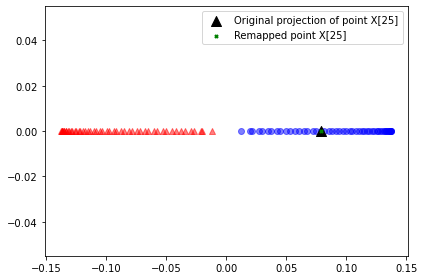

In [84]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=.5)
plt.scatter(x_proj, 0, color='black', label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='Remapped point X[25]', marker='X', s=10)
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

## 3.4.사이킷런의 커널 PCA

In [85]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

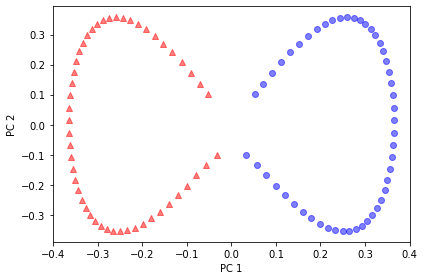

In [86]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=.5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.show()